<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/assignments/dstep23_assignment_02_RVichot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSTEP23 // Assignment #2**

assigned : **Sep 14, 2023**

DUE : **Sep 21, 2023 11:59pm**


## Global Sea Level Rise: When will New Castle Battery Park be underwater?

![alt text](https://lh5.googleusercontent.com/p/AF1QipNu7_-CRmvQTqI7m_V693kOu_IzeeDVYw2Do2UT=w408-h306-k-no)

---

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

No

---

#### **PART 0 - WEEKLY VISUALIZATION**

***<u>NOTE: Part 0 should be done by yourself and not in collaboration with others.</u>***

Beginning this week, part of the weekly assignments will include the finding and visualization of data.  This is – and will continue to be – a *very* open-ended task with two objectives:

1. ***Find a data set on the web that relates to a policy problem***

2. ***Make a plot of some characteristics/features of that data***

These "weekly visualizations" should be done in a <u>separate notebook</u> and should **include a link** to where I can find the data.  **A caption is also necessary** but it is *not* a requirement that the visualization show an obvious relationship (e.g., correlation or scaling) between the features of the data set.  

Lastly, these visualizations should be made **using Python/Jupyter running on your own machine** and not Colaboratory.  And so, as part of this week's assignment:

**Install [Anaconda](https://www.anaconda.com/download) on your machine <small> (scroll to the bottom in the link)</small>**

Anaconda is currently the most widely used Python distribution and includes within it Jupyter as well as other Python-related tools.  If you do not have access to your own computer on which you have permissions to install software for yourself, or if your machine does not have sufficient computational resources to load and analyze data, please let me know!

**To submit the visualization, the `.ipynb` Jupyter notebook that you create and write on your machine should be uploaded to your UD GoogleDrive and shared with me.**

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected.

Measurements of sea level mostly come in two flavors, satellites and tide gauges.  As we discussed in class, the satellite measurements are primarily accomplished by firing radio waves towards the ocean surface and waiting for the time it takes for those radio waves to bounce back and return to the satellite.  Since we know how fast light (radio waves are a form of light) travels, the distance from the satellite to the surface is just the bounce back time divided by the speed of light.  [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) has been one of the most successful satellite missions for these altimetry measurements of the ocean surface.  [Tide gauges](https://en.wikipedia.org/wiki/Tide_gauge), on the other hand, are ground-based measurements that directly measure the height of water relative to a stationary device.  They are less accurate, provide significantly reduced spatial and temporal coverage, but prior to satellite altimetry, were the only real method for measuring sea level.

There are three main goals of this assignment:

1. accessing and working with a century of sea level data
2. fitting linear models to that data for estimates of the rate of sea level rise
3. comparing multiple models for prediction of future sea level

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

### **PART 1 - Background**

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>Read through the two links above on satellite and tide gauge measurements on historical measurements of sea level as well as discussions of sea level rise in the IPCC 2021 Sixth Assessment Report
["Summary for Policy Makers"](https://www.ipcc.ch/report/ar6/wg1/) paying special attention to its historical significance, context within a changing climate, and projections for the future (if you click through the links you'll find a discussion of sea level in Sections B.5.3 and B.5.4 with links to the relevant chapters).</b>

---

### **PART 2 - Loading and plotting the data**

The NOAA data that we used in our first sea level rise notebook covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV into a variable called `csiro`.</b>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


fname = "https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv"
csiro = pd.read_csv(fname)

csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648


<b>Take the <u>minimum</u> of the `"CSIRO Adjusted Sea Level"` and `"NOAA Adjusted Sea Level"` colmuns for each row and add it to the DataFrame as a column called `"min_level"`.</b>

In [120]:
cols = ["CSIRO Adjusted Sea Level","NOAA Adjusted Sea Level"]
csiro["min_level"] = csiro[cols].min(axis=1)


<b>The CSIRO sea level data is in inches.  Convert the `"min_level"` column to millimeters.</B>

In [121]:
csiro['min_level'] = csiro["min_level"]*25.4

Notice that the CSIRO time data is actually a string and includes months and dates.  **Run the cell below to create a column called `"year_int"` that is the CSIRO year as an integer so that we don't have to worry about the months and dates from now on.**

In [122]:
csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]

**Make a plot of the sea-level as a function of time <u>making sure to include a caption</u>.**

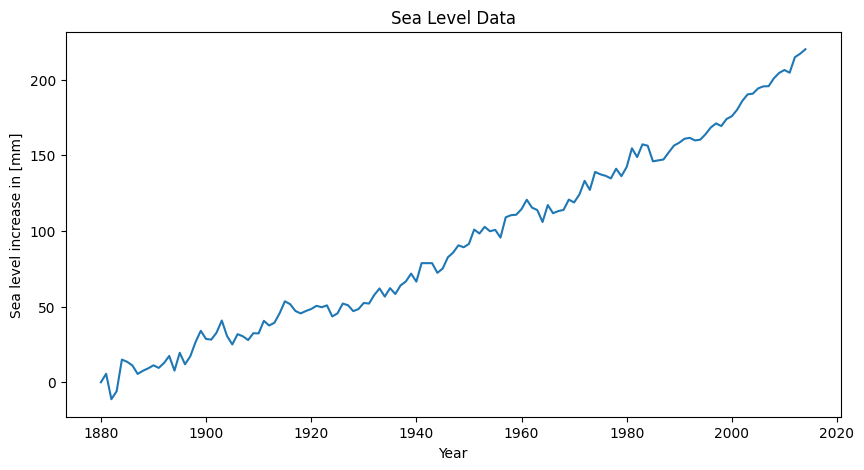

In [123]:
fig, ax = plt.subplots(figsize=(10,5))


plt.title("Sea Level Data")
ax.plot(csiro['year_int'], csiro["min_level"])

ax.set_xlabel("Year")
ax.set_ylabel("Sea level increase in [mm]")

fig.show()

Figure 1: This figure shows the increase of sea level in milimeters from 1884 to 2014.

---

### **PART 3 - Fitting a linear model**

As we did in class with the "recent" NOAA data, your goal here is to estimate the rate of sea level rise.  However, we now have a much longer <i>temporal baseline</i>.

**Using `statsmodels` fit a linear model to the data:**

${\rm sea~level} = a_1 \times {\rm time} + a_0$

**making sure to include a discussion of the measured value of sea level rise, whether or not the model is a "good" fit to the data (and why or why not), and appropriate visualizations with captions.**

In [124]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm


# -- first build the model
model = sm.ols("min_level ~ year_int", data=csiro)

# -- now fit the model to the data
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6040.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          1.03e-112
Time:                        03:49:31   Log-Likelihood:                -488.45
No. Observations:                 135   AIC:                             980.9
Df Residuals:                     133   BIC:                             986.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2943.6655     39.074    -75.335      0.0

In class we discussed the concepts of *variance* as a measure of the dispersion in data and $R^2$ as a measure of the goodness of fit of a model to data.  The two concepts are related since one definition of $R^2$ is the "fraction of explained variance".  

But what does "explained variance" actually mean?  **To visualize this concept, make three plots:**

<b>

1. a histogram of the sea level values (choose reasonable values for the number of bins and range)

2. a plot of the *model residuals* (i.e., the sea level data minus the linear model for the sea level given by the fit above) as a function of time

2. a histogram of the *model residuals*

</b>

**Make sure to include captions for these plots that also state the standard deviation of the data and residuals and describe how they demonstrate that the linear model has "explained some of the variance".**

In [125]:
csiro["model"] = result.predict(csiro)
csiro["residual"] = csiro["min_level"] - csiro["model"]


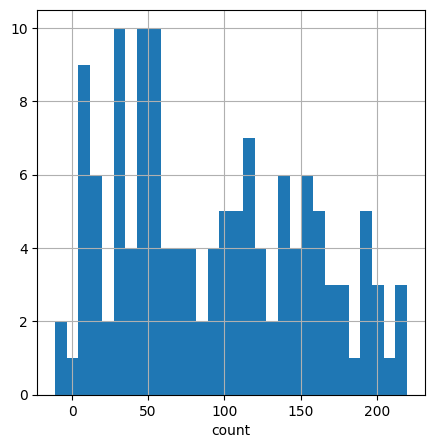

In [126]:
fig, ax = plt.subplots(figsize=(5,5))
#histogram of the sea level values
csiro.min_level.hist(bins=30,ax=ax)
ax.set_xlabel("Sea Level Increase [mm]")
ax.set_xlabel("count")
fig.show()

Figure 2 shows the distribution of the change of sea level values with a total of 30 bins.

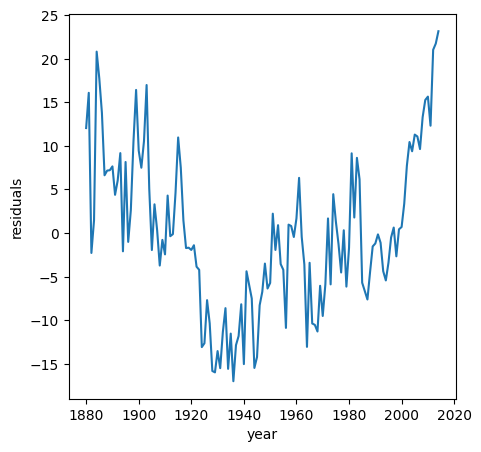

In [127]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(csiro["year_int"], csiro["residual"])
ax.set_xlabel("year")
ax.set_ylabel("residuals")
fig.show()

Figure 3 shows the variation of residuals (difference between actual values and predicted values). Notice that the values seem to be centered around 0.

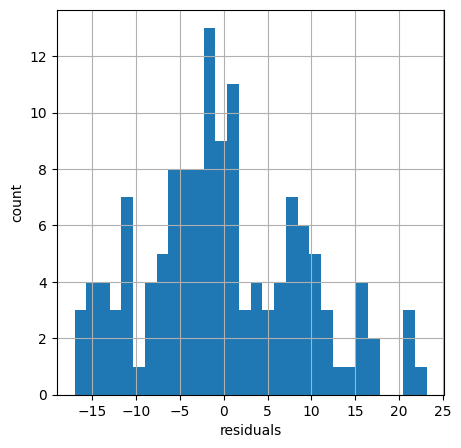

In [128]:
fig, ax = plt.subplots(figsize=(5,5))
csiro.residual.hist(bins=30, ax=ax)
ax.set_xlabel("residuals")
ax.set_ylabel("count")
fig.show()

Figure 4. The distribution of the residuals resembles a normal distribution. Mosty of the information is around the center value (0), still it is far from being a perfect normal distribuition as the tails lack symmetry.

---

### **PART 4 - Comparing Multiple Model Predictions**

Let's expand the model that we're using to fit the data by adding a quadratic term.  In this part, you will compare the two model fits and use each to predict when New Castle Battery Park will be under water due to rising sea level.

**Using the `statsmodels` api, fit a model to the CSIRO data that includes both a linear and quadratic dependence on time.**

In [129]:
model2 = sm.ols("min_level ~ year_int + np.power(year_int, 2)", data = csiro)

result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7074.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          5.54e-135
Time:                        03:49:32   Log-Likelihood:                -431.32
No. Observations:                 135   AIC:                             868.6
Df Residuals:                     132   BIC:                             877.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.607e+

**Plot the CSIRO data with both the linear model and quadratic model overlaid and describe what information is conveyed by this plot.**

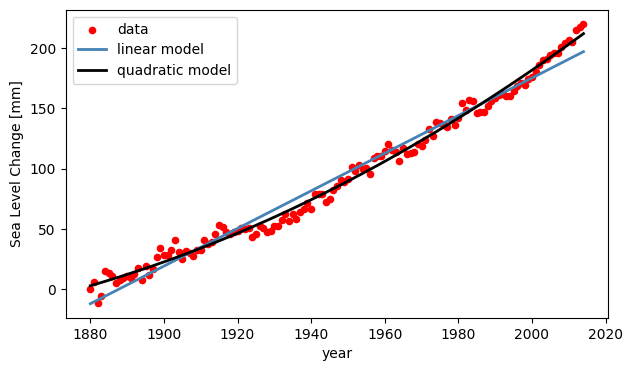

In [130]:
pred2 = result2.predict(csiro)

fig, ax = plt.subplots(figsize=(7, 4))
csiro.plot.scatter("year_int","min_level", color="red", ax=ax, label="data")
ax.plot(csiro["year_int"], csiro["model"], color="steelblue", lw=2, label="linear model")
ax.plot(csiro["year_int"], pred2, color="black", lw=2, label="quadratic model")
ax.set_xlabel("year")
ax.set_ylabel("Sea Level Change [mm]")
ax.legend()
fig.show()

The figure shows the the linear and the quadratic models ploted over the initial data. Both models seem to be accurate, but the quadratic one has a higher rate of change at the end of the model.

**Assuming that the elevation of New Castle Battery Park is 500 mm, in what year will it be under water due to rising sea level in each model?**

In [161]:
# -- create a DataFrame for extrapolation
df = pd.DataFrame()
df["year_int"] = [2209]
# -- predicting a value outisde the fit range
extm = result.predict(df)
df2 = pd.DataFrame()
df2["year_int"] = [2119]
extm2 = result2.predict(df2)

print("According to the linear model the park will be under water around 2209 with a sea level of:")
print(f"{extm[0]} mm")

print("")

print("According to the quadratic model the park will be under water around 2119 with a sea level of:")
print(f"{extm2[0]} mm")


According to the linear model the park will be under water around 2209 with a sea level of:
500.99347608442076 mm

According to the quadratic model the park will be under water around 2119 with a sea level of:
501.4539457346109 mm


**Determine the probability that the quadratic model is a better fit to the data using a likelihood ratio test.**

In [177]:
# -- likelihood ratio test
lr, pval, ddof = result2.compare_lr_test(result)
print("p-value: {0}".format(round(pval, 5)))

p-value: 0.0


We can reject the null hypothesis that the linear model is better than the quadratic model.

**<u>Briefly</u> discuss your results in the context of the IPCC 2021 Sixth Assessment Report (200 words max).**

The quadratic model seems to be a better fit than the linear model. This has impotant implications because it means that the sea level rise is increasing as a quadratic function of time. Therefore, the scenario seems less optimistic because quadratic fuctions grow faster than linear fuctions.